# Finite Difference Method for the Advection Equation 1D



## Conservation Laws

Let us consider the following partial differential equation (PDE):
\begin{equation}
\tag{1}
u_t(x,t) + \beta\cdot u_x(x,t) = 0, \quad (x,t)\in\Omega\times (0,T),
\end{equation}
where $\Omega=(a,b)\subset\mathbb R$ and  $\beta\in\mathbb R$.

- It is a hyperbolic equation which represents a **conservation law**. In fact, it can be written as
\begin{equation}
\tag{2}
u_t(x,t) + f( u(x,t) )_x = 0
\end{equation}
for the flux $f(q)=\beta\cdot u(x,t)$ and one has:
$$
\frac d{dt} \int_{x_1}^{x_2} u(x,t)\; dt = f(u(x_1,t)) - f(u(x_2,t)),
$$
for all $x_1,x_2\in(a,b)$. 

- That is: the mass (total ammount of $u$) in any subinterval $(x_1,x_2)$ is conserved, and it only can change due to the flux through the endpoints $x_1$ and $x_2$.

## Finite Difference Methods

**Finite difference** are numerical methods for approximating the solution of (1). They are defined on computing values $u^n_i\in\mathbb{R}$ ($n=0,\dots,N_t$, $i=0,\dots,N_x$), such that
$$
u_i^n \simeq u(x_i, t_n).
$$
These values are obtained by approximating the partial derivatives $u_t(x_i,t_n)$ and  $u_x(x_i,t_n)$, arising in $(1)$,
 by **incremental quotiens** defined on the **nodes of $(x,t)$ grids**:
- $a=x_{0}<x_{1}\dots<x_{N_x}=b$
- $0=t_{0}<t_{1}\dots<t_{N_t}$

For simplicity, we will assume a uniform grids, i.e $x_{i+1}-x_{i}$ and $t_{n+1}-t_n$ are constants for all $i$ and $n$. We define
- $h = x_{i+1}-x_{i} \quad (= \frac{b-a}{N_x})$, the *space step*
- $k = t_{n+1}-t_{n}$, the *time step*

One can define these incremental quotients in several ways, giving rise to different finite difference methods. Here we focus on **explicit** finite difference methods, where
$$
u_t(x_i,t_{n+1}) \simeq \frac{u_i^{n+1} - u_i^n} k
$$
and the advection PDE equation (1) is approximated as:
$$
\frac{u_i^{n+1} - u_i^n} k + \beta \frac{H^n_{i+1/2}-H^n_{i-1/2}} h=0,
$$
where $H^n_{i+1/2}=H(u_j^n,u_{j+1}^n)$ for a suitable function $H(\cdot,\cdot)$ (and $H^n_{i-1/2}$ accordingly defined) are called numerical fluxes. Different fluxes will conduce to different explicit methods as follows:
\begin{equation}
\tag{3}
u_i^{n+1} = u_i^n  - \frac{k}{h} \beta \left( H^n_{i+1/2}-H^n_{i-1/2}\right).
\end{equation}

## Some Explicit Methods for the Advection Equation

Let $\lambda=\frac{k}{h}$. Some usual explicit methods for the advection equation are:

### Centered flux

$$
u_i^{n+1} = u_i^n  - \frac{\lambda}{2} \beta\left( u_{i+1}^n-u_{i-1}^n \right).
$$

### Lax-Friedrichs

$$
u_i^{n+1} = 
\frac{1}{2}\left(u_{i+1}^n+u_{i-1}^n\right) -  \frac{\lambda}{2} \beta\left( u_{i+1}^n-u_{i-1}^n \right),
$$

### Lax-Wendroff

$$
u_i^{n+1} = u_i^n  
- \frac{\lambda}{2} \beta\left( u_{i+1}^n-u_{i-1}^n \right) 
+ \frac{\lambda^2}{2}\beta^2\left(u_{i+1}^n - 2u_j^n +u_{i-1}^n\right).
$$

Each one of them is obtanied by defining a heuristic definition of a numerical flux $H^n_{i+1/2}$ and plugin it into equation (3). For instance, the centered method is obtained from $H^n_{i+1/2}=\frac12\beta\left(u_{i+1}^n + u_{i-1}^n\right)$. See e.g [Quarteroni, Strikwerda] for deatils.

### Boundary Treatment

For well-possedness of problem (1) it is neccesary to be given:
- The initial condition at $t=0$: A function $u_0(x)$ from which
$$u^0_i = u_0(x_i)\quad \forall i=0,\dots,N_t.$$
- Some condition on the boundary values, $x=a$ and $x=b$, for all $t>0$.

Treatment of boundary conditions is a delicate matter and here we cannot delve into it (see e.g. [Strickwerda, Quarteroni, LeVeque]). We are simply going to consider the following no-flux (Neumann) condition on the boundary ($x_0=a$, $x_{N_x}=b$):
$$u_x(x_0,t)=u_x(x_{N_x},t)=0 \quad \forall t>0.$$

We approximate it by:
$$
\frac{u_1^{n+1}-u_0^{n+1}}h = \frac{u_{N_x}^{n+1}-u_{N_x-1}^{n+1}}h =0,
$$
s that, after computing $u_i^{n+1}$ for each $i=1,\dots,N_x-1$, we can take:
- $u_0^{n+1} = u_1^{n+1}$
- $u_{N_x}^{n+1} = u_{N_x-1}^{n+1}$

## Excercise:
1. Program a function `advection_LaxFriedrichs` with the following parameters:
       a, b : [a,b] interval
       beta : advection velocity
       u0: array of initial values [u_1^0, u_2^0..., u_{N}^0]
       dx, dt:  x step and t step
       nt: number of time iterations

   - It returns a list, `u`, such that `u[n]` is the approximation at time iteration `n` (and therefore `u[n][i]` is the solution at time `n` and at node $x_i$) 

## Solution

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Automaticic loading of modules
%load_ext autoreload
%autoreload 2

# Load our module (mdf.py)
import mdf1D as mdf

In [3]:
from mdf1D import advection_LaxFriedrichs
u = advection_LaxFriedrichs(a, b, beta, u0, dx, dt, nt)

## Animation

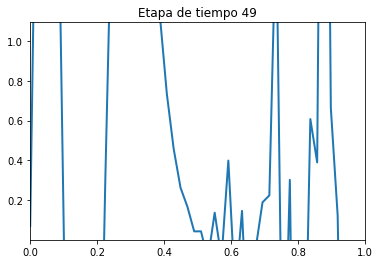

In [17]:
# The basis:

# Matplotlib includes a function "animation"
from matplotlib import animation, rc

# And in Jupyter we can draw HTML
from IPython.display import HTML

a, b = mdf.X0, mdf.X1
x_i = mdf.x

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = mpl.subplots()
ax.set_xlim( (a, b) )
#   ...we use the initial condition to prepare y limits
y_m = 1.1*min(u[0])
y_M = 1.1*max(u[0])
ax.set_ylim( (y_m, y_M) )
line, = ax.plot([], [], lw=2)

# Initialization for each frame (it plots the background):
def init():
    line.set_data([], [])
    return (line,)

# Animation function, which is called for each new frame:
def animate(i):
    y_i = u[i]
    line.set_data(x_i, y_i)
    ax.set_title(f"Etapa de tiempo {i}")
    return (line,)

# Compile the animation. Setting blit=True will only re-draw
# the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20, 
                               blit=True)

# And use JavaScript in HTML to show results
HTML(anim.to_jshtml())